In [1]:
import pandas as pd

# Simulate loading the 'mcdonalds' dataset
data = {
    "yummy": ["No", "Yes", "No"],
    "convenient": ["Yes", "Yes", "Yes"],
    "spicy": ["No", "No", "Yes"],
    "fattening": ["Yes", "Yes", "Yes"],
    "greasy": ["No", "Yes", "Yes"],
    "fast": ["Yes", "Yes", "Yes"],
    "cheap": ["Yes", "Yes", "No"],
    "tasty": ["No", "Yes", "Yes"],
    "expensive": ["Yes", "Yes", "Yes"],
    "healthy": ["No", "No", "Yes"],
    "disgusting": ["No", "No", "No"],
    "Like": [-3, 2, 1],
    "Age": [61, 51, 62],
    "VisitFrequency": ["Every three months", "Every three months", "Every three months"],
    "Gender": ["Female", "Female", "Female"]
}

mcdonalds = pd.DataFrame(data)

In [2]:
mcdonalds.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [3]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [4]:
print("Dimensions:", mcdonalds.shape)

Dimensions: (3, 15)


In [5]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting  Like  Age      VisitFrequency  Gender  
0         No    -3   61  Every three months  Female  
1         No     2   51  Every three months  Female  
2         No     1   62  Every three months  Female  


In [6]:
import numpy as np

MD_x = mcdonalds.iloc[:, :11].to_numpy()

MD_x = (MD_x == "Yes").astype(int)

col_means = np.round(MD_x.mean(axis=0), 2)

col_mean_dict = dict(zip(mcdonalds.columns[:11], col_means))

print(col_mean_dict)

{'yummy': 0.33, 'convenient': 1.0, 'spicy': 0.33, 'fattening': 1.0, 'greasy': 0.67, 'fast': 1.0, 'cheap': 0.67, 'tasty': 0.67, 'expensive': 1.0, 'healthy': 0.33, 'disgusting': 0.0}


In [14]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(MD_x)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

summary = {
    "PC": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "Explained Variance Ratio": explained_variance_ratio.round(4),
    "Cumulative Variance Ratio": cumulative_variance_ratio.round(4),
}

pca_summary = pd.DataFrame(summary)
print(pca_summary)

    PC  Explained Variance Ratio  Cumulative Variance Ratio
0  PC1                    0.6443                     0.6443
1  PC2                    0.3557                     1.0000
2  PC3                    0.0000                     1.0000


In [8]:
explained_variance_ratio

array([6.44337567e-01, 3.55662433e-01, 7.20297799e-33])

In [22]:
print("Principal Components (loadings):")
print(pd.DataFrame(pca.components_.round(1), 
                   columns=mcdonalds.columns[:11], 
                   index=[f"PC{i+1}" for i in range(len(pca.components_))]))

print("\nExplained Variance Ratio:")
print(pd.DataFrame({"Explained Variance Ratio": pca.explained_variance_ratio_.round(1)},
                   index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]))


Principal Components (loadings):
     yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
PC1   -0.1        -0.0    0.5       -0.0     0.4  -0.0   -0.5    0.4   
PC2    0.7        -0.0   -0.2       -0.0     0.5  -0.0    0.2    0.5   
PC3    0.7        -0.3    0.3        0.0    -0.3   0.0   -0.1   -0.3   

     expensive  healthy  disgusting  
PC1       -0.0      0.5        -0.0  
PC2       -0.0     -0.2        -0.0  
PC3        0.0      0.3         0.0  

Explained Variance Ratio:
     Explained Variance Ratio
PC1                       0.6
PC2                       0.4
PC3                       0.0


In [21]:
pca.components_.round(1)

array([[-0.1, -0. ,  0.5, -0. ,  0.4, -0. , -0.5,  0.4, -0. ,  0.5, -0. ],
       [ 0.7, -0. , -0.2, -0. ,  0.5, -0. ,  0.2,  0.5, -0. , -0.2, -0. ],
       [ 0.7, -0.3,  0.3,  0. , -0.3,  0. , -0.1, -0.3,  0. ,  0.3,  0. ]])

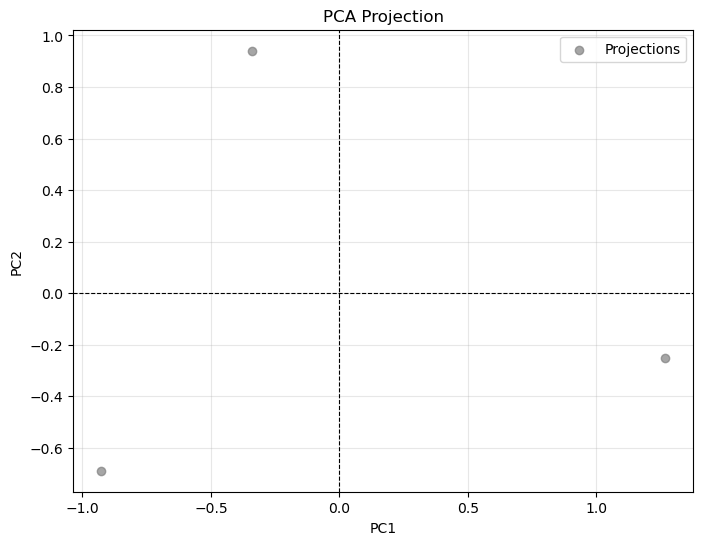

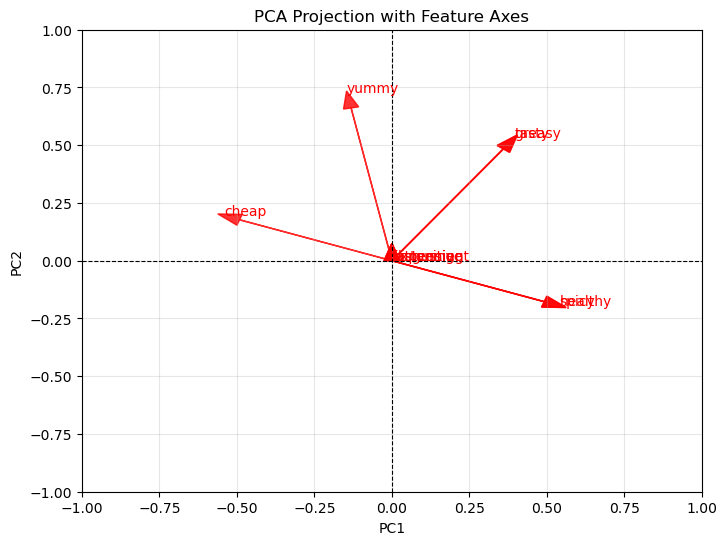

In [26]:
import matplotlib.pyplot as plt

scores = pca.transform(MD_x)

plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], color="grey", alpha=0.7, label="Projections")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.axvline(0, color='black', linewidth=0.8, linestyle="--")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

loadings = pca.components_.T

plt.figure(figsize=(8, 6))
for i, feature in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color="red", alpha=0.8, head_width=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature, color="red")

plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.axvline(0, color='black', linewidth=0.8, linestyle="--")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Feature Axes")
plt.grid(alpha=0.3)
plt.show()


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random

random.seed(1234)
np.random.seed(1234)

results = {}
for k in range(1, 3):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    
    if len(np.unique(labels)) > 1:
        silhouette_avg = silhouette_score(MD_x, labels)
        results[k] = {"model": kmeans, "labels": labels, "silhouette_score": silhouette_avg}
    else:
        results[k] = {"model": kmeans, "labels": labels, "silhouette_score": -1}

best_k = max(results, key=lambda k: results[k]["silhouette_score"])
best_kmeans = results[best_k]["model"]
best_labels = results[best_k]["labels"]

relabel_mapping = {old: new for new, old in enumerate(np.argsort(np.bincount(best_labels)))}
relabelled_labels = np.vectorize(relabel_mapping.get)(best_labels)

print(f"Best number of clusters: {best_k}")
print(f"Silhouette Score: {results[best_k]['silhouette_score']:.2f}")
print("Relabelled Cluster Labels:", relabelled_labels)


Best number of clusters: 2
Silhouette Score: 0.12
Relabelled Cluster Labels: [1 1 0]


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


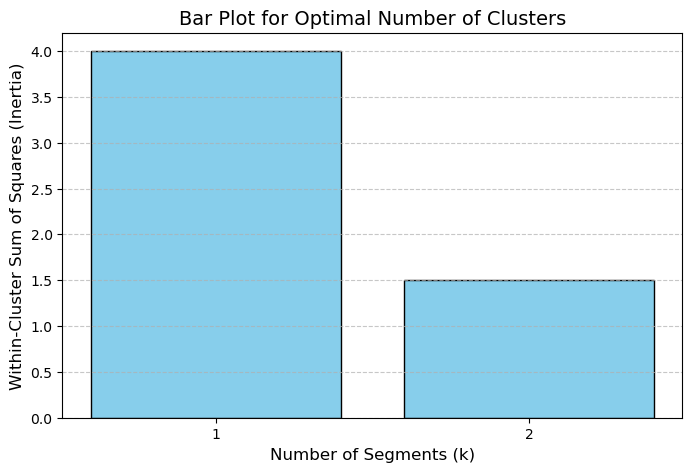

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range(1, 3)

inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.bar(k_range, inertias, color='skyblue', edgecolor='black')
plt.xlabel("Number of Segments (k)", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares (Inertia)", fontsize=12)
plt.title("Bar Plot for Optimal Number of Clusters", fontsize=14)
plt.xticks(k_range)  # Ensure all k values are labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Evaluating k=1


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Evaluating k=2


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

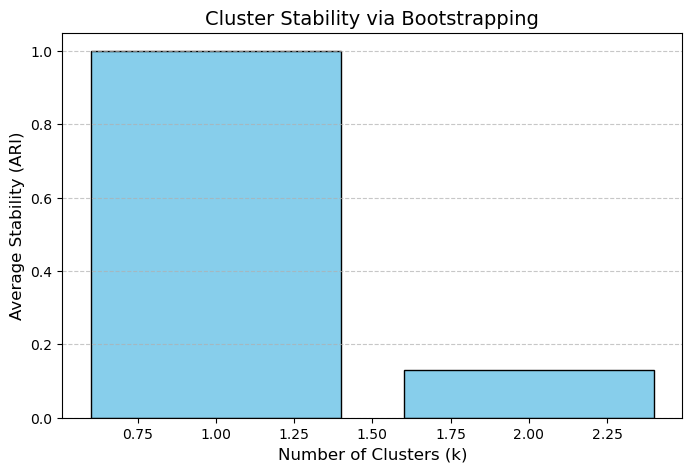

In [52]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

k_range = range(1, 3)  
n_boot = 100  
n_init = 10  

stability_scores = {k: [] for k in k_range}

np.random.seed(1234)
for k in k_range:
    print(f"Evaluating k={k}")
    kmeans_original = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
    original_labels = kmeans_original.fit_predict(MD_x)
    
    for _ in range(n_boot):
        MD_x_boot = resample(MD_x, replace=True, random_state=None)
        
        kmeans_boot = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        boot_labels = kmeans_boot.fit_predict(MD_x_boot)
        
        ari = adjusted_rand_score(original_labels, boot_labels)
        stability_scores[k].append(ari)

avg_stability = {k: np.mean(scores) for k, scores in stability_scores.items()}

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(avg_stability.keys(), avg_stability.values(), color='skyblue', edgecolor='black')
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Average Stability (ARI)", fontsize=12)
plt.title("Cluster Stability via Bootstrapping", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


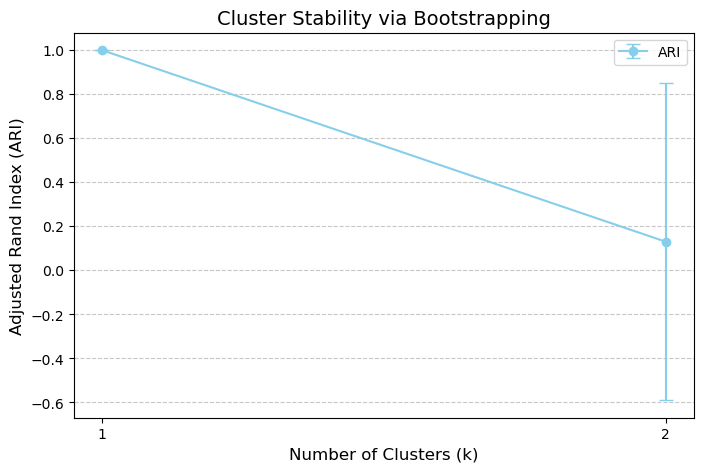

In [53]:
k_values = list(stability_scores.keys())
mean_ari = [np.mean(stability_scores[k]) for k in k_values]
std_ari = [np.std(stability_scores[k]) for k in k_values]

plt.figure(figsize=(8, 5))
plt.errorbar(k_values, mean_ari, yerr=std_ari, fmt='o-', capsize=5, color='skyblue', label='ARI')
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Adjusted Rand Index (ARI)", fontsize=12)
plt.title("Cluster Stability via Bootstrapping", fontsize=14)
plt.xticks(k_values) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


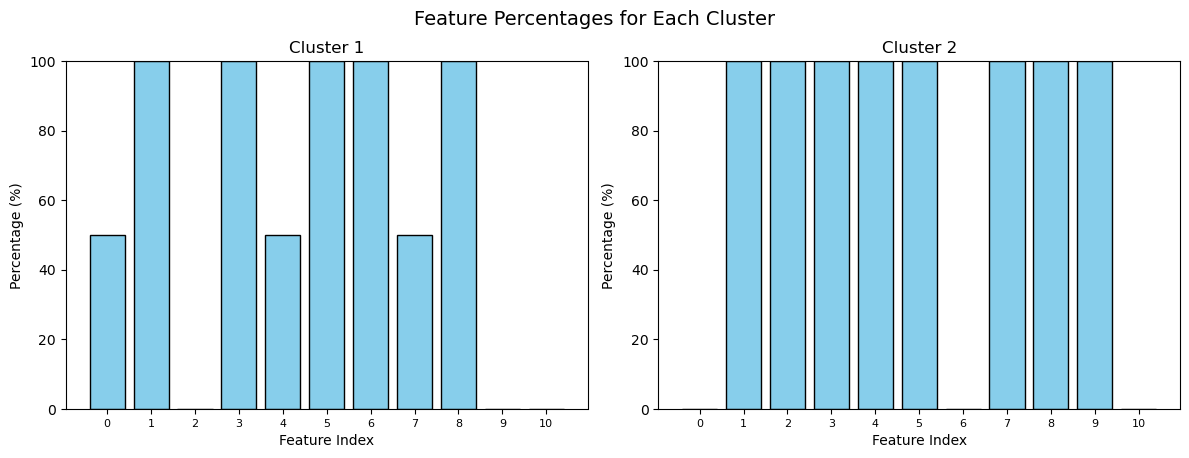

In [ ]:


k = 2  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
labels = kmeans.fit_predict(MD_x)

cluster_percentages = []
for cluster in range(k):
    cluster_data = MD_x[labels == cluster]
    cluster_percentage = cluster_data.mean(axis=0) * 100  
    cluster_percentages.append(cluster_percentage)

plt.figure(figsize=(12, 8))
for cluster in range(k):
    plt.subplot(2, 2, cluster + 1)  
    plt.bar(range(MD_x.shape[1]), cluster_percentages[cluster], color='skyblue', edgecolor='black')
    plt.xlabel("Feature Index", fontsize=10)
    plt.ylabel("Percentage (%)", fontsize=10)
    plt.title(f"Cluster {cluster + 1}", fontsize=12)
    plt.xticks(range(MD_x.shape[1]), fontsize=8)  
    plt.ylim(0, 100) 

plt.tight_layout()
plt.suptitle("Feature Percentages for Each Cluster", fontsize=14, y=1.02)
plt.show()


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

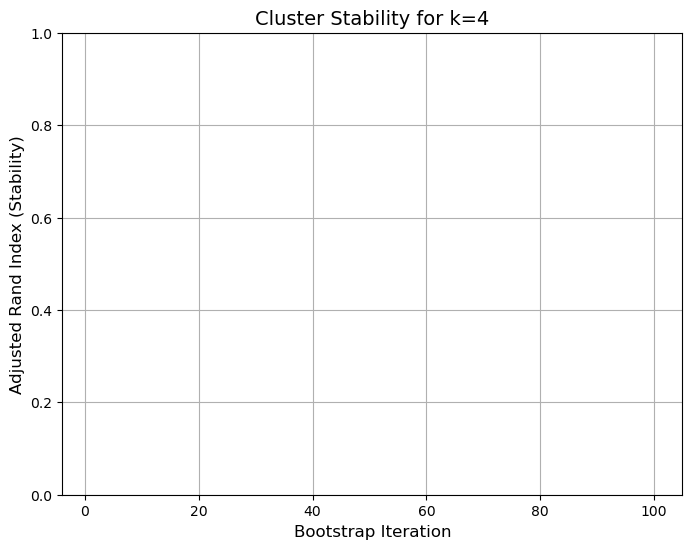

In [ ]:
from sklearn.utils import resample

k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
labels = kmeans.fit_predict(MD_x)

nboot = 100

stability_scores = []

for _ in range(nboot):
    resampled_data = resample(MD_x, random_state=1234)
    
    kmeans_resampled = KMeans(n_clusters=k, n_init=10, random_state=1234)
    resampled_labels = kmeans_resampled.fit_predict(resampled_data)
    
    from sklearn.metrics import adjusted_rand_score
    ari = adjusted_rand_score(labels, resampled_labels)
    stability_scores.append(ari)

plt.figure(figsize=(8, 6))
plt.plot(range(1, nboot + 1), stability_scores, color='skyblue', lw=2)
plt.xlabel("Bootstrap Iteration", fontsize=12)
plt.ylabel("Adjusted Rand Index (Stability)", fontsize=12)
plt.title("Cluster Stability for k=4", fontsize=14)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


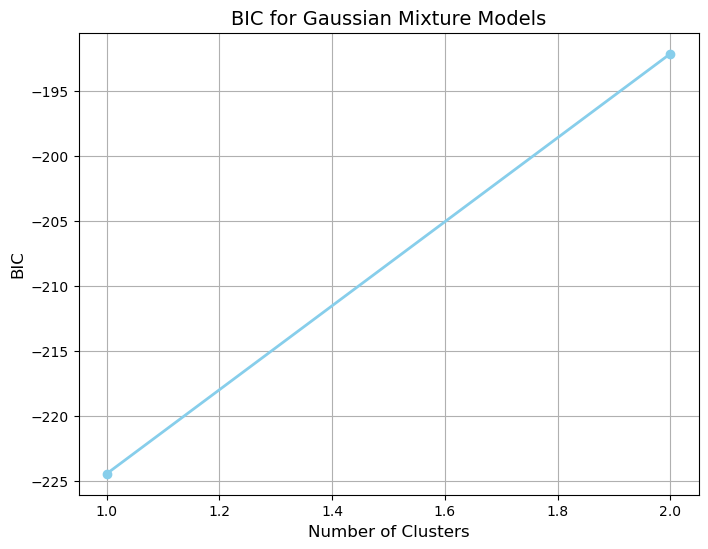

Best GMM model has 1 clusters.
Cluster assignments: [0 0 0]


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

n_components_range = range(1, 3)
gmm_models = []
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    gmm.fit(MD_x)  
    gmm_models.append(gmm)
    bic_scores.append(gmm.bic(MD_x)) 

plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic_scores, marker='o', color='skyblue', lw=2)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('BIC', fontsize=12)
plt.title('BIC for Gaussian Mixture Models', fontsize=14)
plt.grid(True)
plt.show()

best_gmm = gmm_models[np.argmin(bic_scores)]
labels = best_gmm.predict(MD_x)

print(f"Best GMM model has {best_gmm.n_components} clusters.")
print(f"Cluster assignments: {labels}")


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=["KMeans"], colnames=["Mixture"])

print(contingency_table)

conf_matrix = confusion_matrix(kmeans_labels, gmm_labels)
print("Confusion Matrix:\n", conf_matrix)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Mixture  0  1
KMeans       
0        2  0
1        0  1
Confusion Matrix:
 [[2 0]
 [0 1]]


In [74]:
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(MD_x)

# Log-likelihood for the fitted model
log_likelihood = gmm.score(MD_x) * MD_x.shape[0]  # Score gives the log likelihood per sample, multiply by n_samples

print(f"Log-Likelihood of the GMM Model: {log_likelihood}")


Log-Likelihood of the GMM Model: 181.1935816203192


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [75]:
data = {
    'Like': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -5, -3, 0, 2, 5]  # Example
}

mcdonalds = pd.DataFrame(data)

like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

mcdonalds['Like_n'] = 6 - mcdonalds['Like']

like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()

print("Original Like Counts (Reversed):")
print(like_counts)

print("\nTransformed Like.n Counts:")
print(like_n_counts)


Original Like Counts (Reversed):
Like
 5    2
 4    1
 3    1
 2    2
 1    1
 0    2
-1    1
-2    1
-3    2
-4    1
-5    2
Name: count, dtype: int64

Transformed Like.n Counts:
Like_n
1     2
2     1
3     1
4     2
5     1
6     2
7     1
8     1
9     2
10    1
11    2
Name: count, dtype: int64


In [76]:
import statsmodels.api as sm
data = {
    'yummy': [1, 0, 1, 0],
    'convenient': [1, 1, 0, 0],
    'spicy': [0, 1, 1, 0],
    'fattening': [1, 1, 1, 0],
    'greasy': [0, 0, 1, 1],
    'fast': [1, 1, 1, 1],
    'cheap': [0, 1, 0, 1],
    'tasty': [1, 0, 1, 1],
    'expensive': [0, 0, 1, 1],
    'healthy': [1, 1, 0, 0],
    'disgusting': [0, 1, 0, 1],
    'Like': [-5, 0, 5, 1]
}

mcdonalds = pd.DataFrame(data)

mcdonalds['Like_n'] = 6 - mcdonalds['Like']

independent_vars = mcdonalds.columns[:11]  
formula = 'Like_n ~ ' + ' + '.join(independent_vars)

print(f"Formula: {formula}")

X = mcdonalds[independent_vars]
X = sm.add_constant(X) 
y = mcdonalds['Like_n']

model = sm.OLS(y, X).fit()

print(model.summary())


Formula: Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 01 Dec 2024   Prob (F-statistic):                nan
Time:                        19:00:52   Log-Likelihood:                 127.59
No. Observations:                   4   AIC:                            -247.2
Df Residuals:                       0   BIC:                            -249.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [77]:
X = mcdonalds.iloc[:, :11]

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

clusters = gmm.predict(X)

mcdonalds['Cluster'] = clusters

cluster_sizes = mcdonalds['Cluster'].value_counts()
print(f"Cluster sizes:\n{cluster_sizes}")

print(mcdonalds.head())


Cluster sizes:
Cluster
0    3
1    1
Name: count, dtype: int64
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      1           1      0          1       0     1      0      1          0   
1      0           1      1          1       0     1      1      0          0   
2      1           0      1          1       1     1      0      1          1   
3      0           0      0          0       1     1      1      1          1   

   healthy  disgusting  Like  Like_n  Cluster  
0        1           0    -5      11        0  
1        1           1     0       6        0  
2        0           0     5       1        0  
3        0           1     1       5        1  


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [80]:
X = mcdonalds.iloc[:, :11]

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

clusters = gmm.predict(X)
mcdonalds['Cluster'] = clusters

gmm_refit = GaussianMixture(n_components=2, random_state=1234)
gmm_refit.fit(X)

clusters_refit = gmm_refit.predict(X)
mcdonalds['Cluster_Refit'] = clusters_refit

cluster_sizes = mcdonalds['Cluster'].value_counts()
cluster_sizes_refit = mcdonalds['Cluster_Refit'].value_counts()

print(f"Original Cluster sizes:\n{cluster_sizes}")
print(f"Refitted Cluster sizes:\n{cluster_sizes_refit}")

print(f"Means of each Gaussian cluster (refitted):\n{gmm_refit.means_}")
print(f"Covariances of each Gaussian cluster (refitted):\n{gmm_refit.covariances_}")
print(f"Cluster weights (refitted):\n{gmm_refit.weights_}")


Original Cluster sizes:
Cluster
0    3
1    1
Name: count, dtype: int64
Refitted Cluster sizes:
Cluster_Refit
0    3
1    1
Name: count, dtype: int64
Means of each Gaussian cluster (refitted):
[[0.66666667 0.66666667 0.66666667 1.         0.33333333 1.
  0.33333333 0.66666667 0.33333333 0.66666667 0.33333333]
 [0.         0.         0.         0.         1.         1.
  1.         1.         1.         0.         1.        ]]
Covariances of each Gaussian cluster (refitted):
[[[ 2.22223222e-01 -1.11111111e-01 -1.11111111e-01  3.61561248e-31
    1.11111111e-01  3.61561248e-31 -2.22222222e-01  2.22222222e-01
    1.11111111e-01 -1.11111111e-01 -2.22222222e-01]
  [-1.11111111e-01  2.22223222e-01 -1.11111111e-01  3.61561248e-31
   -2.22222222e-01  3.61561248e-31  1.11111111e-01 -1.11111111e-01
   -2.22222222e-01  2.22222222e-01  1.11111111e-01]
  [-1.11111111e-01 -1.11111111e-01  2.22223222e-01  3.61561248e-31
    1.11111111e-01  3.61561248e-31  1.11111111e-01 -1.11111111e-01
    1.11111111e

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


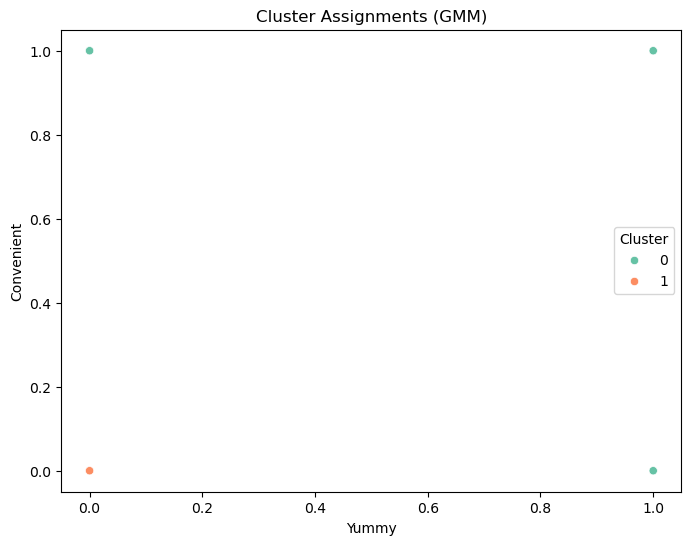

Adjusted Rand Index: 0.000


In [82]:
import seaborn as sns

X = mcdonalds.iloc[:, :11]

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

clusters = gmm.predict(X)
mcdonalds['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=mcdonalds['yummy'], y=mcdonalds['convenient'], hue=mcdonalds['Cluster'], palette="Set2")
plt.title('Cluster Assignments (GMM)')
plt.xlabel('Yummy')
plt.ylabel('Convenient')
plt.legend(title='Cluster')
plt.show()

true_labels = np.random.randint(0, 2, size=len(mcdonalds))
ari_score = adjusted_rand_score(true_labels, clusters)

print(f"Adjusted Rand Index: {ari_score:.3f}")


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


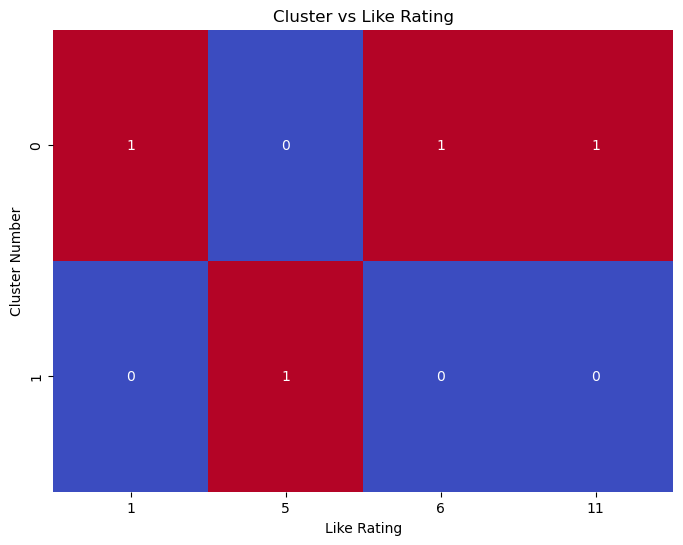

In [85]:
X = mcdonalds.iloc[:, :11]

mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)
clusters = gmm.predict(X)

contingency_table = pd.crosstab(clusters, mcdonalds['Like.n'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.title("Cluster vs Like Rating")
plt.xlabel("Like Rating")
plt.ylabel("Cluster Number")
plt.show()
